<a href="https://colab.research.google.com/github/chrdrn/digital-behavior-data-binder/blob/main/session_07-showcase_tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IMG SRC="https://raw.githubusercontent.com/chrdrn/digital-behavioral-data/main/img/dbd_hex.png" WIDTH=15% HEIGHT=15% ALIGN="left" HSPACE="20" VSPACE="20" /> 
<h1>Disclaimer </h1>
<p>For reasons of research ethics and out of respect for privacy the data collected and processed in the course will be managed in a private OSF repository. Students will only have access to this OSF repository for a limited period of time. </p>
<p>Although the collection of data is (at least) partially documented in the showcases, detailed instructions can be found in the slides of course for the respective session. </p>
<p> Link: <a href="https://chrdrn.github.io/digital-behavioral-data/">https://chrdrn.github.io/digital-behavioral-data/</a>
</p>

<BR CLEAR=”left” />

---
### <img src="https://icons.getbootstrap.com/assets/icons/info-circle-fill.svg" width="15" height="15"> Technical note

While the chunk outputs were saved, the data basis was not. For an error-free execution of this notebook, the data must be collected and reloaded. All chunks for which the path to the data must be re-entered are marked with the following symobl: <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="15" height="15">

---

# Background

This showcase is intended to illustrate different analysis possibilities of <img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/tiktok.svg" width="15" height="15"> TikTok data downloaded with the [`Zeeschuimer`](https://github.com/digitalmethodsinitiative/zeeschuimer) browser extension.




## Preparation

Install addtional necessary packages

⚠ It might take a few minutes to install all packages and dependencies



In [ ]:
install.packages(c(
  "ggpubr",
  "sjmisc",
  "sjPlot",
  "quanteda",
  "quanteda.textplots"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘coda’, ‘corrplot’, ‘car’, ‘emmeans’, ‘lme4’, ‘ISOcodes’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘insight’, ‘sjlabelled’, ‘bayestestR’, ‘datawizard’, ‘effectsize’, ‘ggeffects’, ‘parameters’, ‘performance’, ‘sjstats’, ‘fastmatch’, ‘Rcpp’, ‘RcppParallel’, ‘SnowballC’, ‘stopwords’, ‘RcppArmadillo’, ‘extrafont’, ‘sna’, ‘igraph’, ‘network’




## Data analysis

*   based on TikToks that are tagged with the hashtag `statistics`
*   collected via [`Zeeschuimer`](https://github.com/digitalmethodsinitiative/zeeschuimer) with .csv export via 🐈🐈 [**4CAT**](https://github.com/digitalmethodsinitiative/4cat) 🐈🐈

### <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="15" height="15"> Data import from local

In [ ]:
# load packages
library(tidyverse)
library(readr)

# get data from github
statistics <- read_csv(ADD_DATA_PATH_HERE,
  col_types = cols(author_followers = col_number()))

# quick preview
statistics %>% glimpse()


Rows: 941
Columns: 24
$ id               <dbl> 6.813800e+18, 6.832737e+18, 6.845368e+18, 6.927122e+1…
$ thread_id        <dbl> 6.813800e+18, 6.832737e+18, 6.845368e+18, 6.927122e+1…
$ author           <chr> "onlyjayus", "onlyjayus", "ryguy238", "mason.whaley",…
$ author_full      <chr> "actuallyitsbella", "actuallyitsbella", "ryan p", "Ma…
$ author_id        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ author_followers <dbl> 18500000, 18500000, 28500, 151500, 15700, 319500, 693…
$ body             <chr> "You’re sexy. The math proves it #fyp #love #dating #…
$ timestamp        <dttm> 2020-04-09 19:44:39, 2020-05-30 20:28:05, 2020-07-03…
$ unix_timestamp   <dbl> 1586461479, 1590870485, 1593811442, 1612846242, 16420…
$ is_duet          <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALS…
$ music_name       <chr> "SexyBack", "original sound", "original sound", "orig…
$ music_id         <dbl> 6.696418e+18, 6.832737e+18, 6.845368e+18, 6.927122e+1…
$ music_url       

### Data exploration



####  Periode in which the TikToks were posted

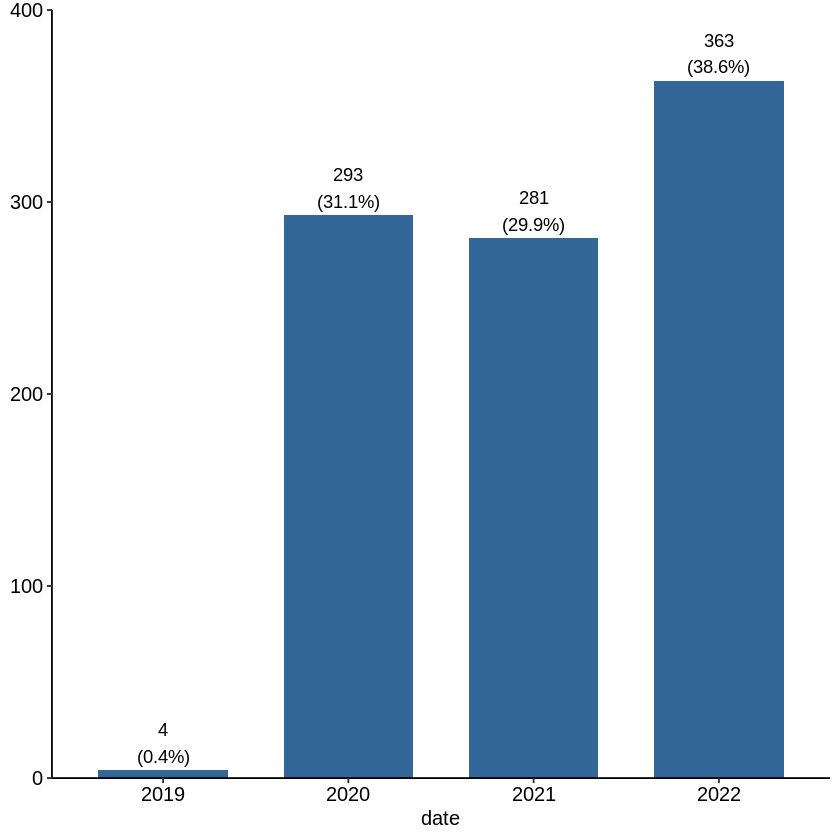

In [ ]:
# Load additional packages
library(lubridate)
library(sjPlot)
library(ggpubr)

# Display 
statistics %>% 
  mutate(date  = as.factor(year(timestamp))) %>% 
  plot_frq(date) +
  theme_pubr()

#### Location parameters of different statistics

In [ ]:
# Load additional packages
library(sjmisc)

# Get location parameters
statistics %>% 
  select(likes:plays) %>% 
  descr()


Attaching package: ‘sjmisc’


The following object is masked from ‘package:purrr’:

    is_empty


The following object is masked from ‘package:tidyr’:

    replace_na


The following object is masked from ‘package:tibble’:

    add_case




,var,type,label,n,NA.prc,mean,sd,se,md,trimmed,range,iqr,skew
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2,likes,numeric,likes,941,0,50412.325,110696.225,3608.59381,16600,26511.3280,1395280 (4720-1400000),37830,6.139386
1,comments,numeric,comments,941,0,980.508,2380.288,77.59517,351,537.5631,36900 (0-36900),791,8.937727
4,shares,numeric,shares,941,0,1349.889,4755.660,155.03010,262,527.1873,93796 (4-93800),820,12.239493
3,plays,numeric,plays,941,0,384388.523,750096.584,24452.44979,153700,220367.4635,7985100 (14900-8e+06),309300,5.441798


#### Distribution of likes


Warning message:
“`stat(density)` was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the sjPlot package.
  Please report the issue at <https://github.com/strengejacke/sjPlot/issues>.”


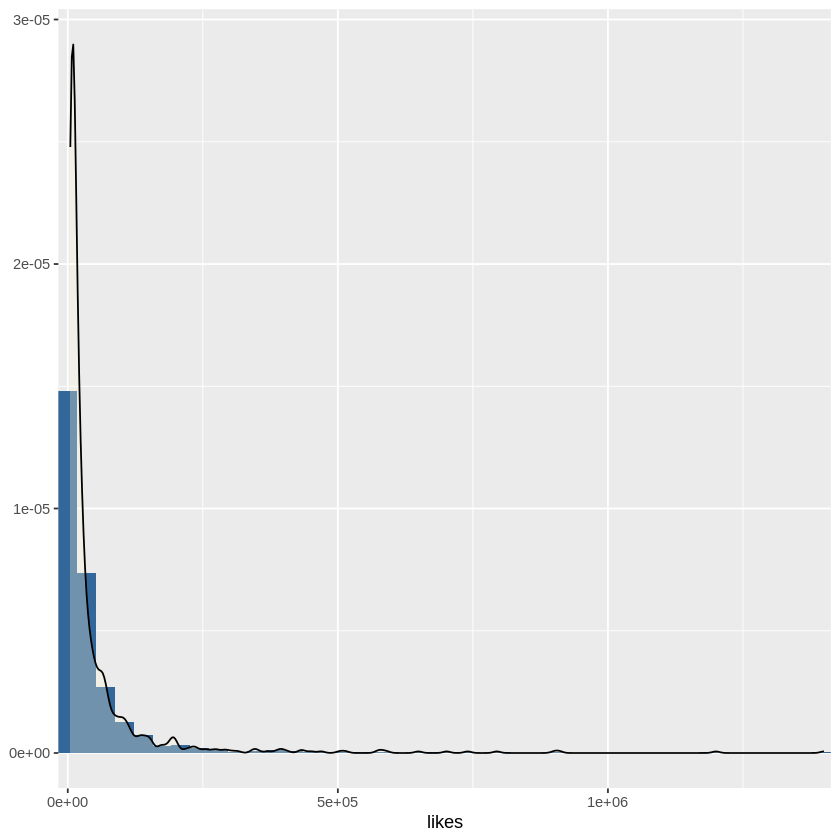

In [ ]:
statistics %>% 
  plot_frq(likes, type = "density")

#### Warning messages displayed in TikToks

In [ ]:
statistics %>% 
  frq(warning)

val,label,frq,raw.prc,valid.prc,cum.prc
<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Learn more about COVID-19 vaccines,<none>,9,0.96,37.5,37.5
Learn the facts about COVID-19,<none>,9,0.96,37.5,75.0
The actions in this video are performed by professionals or supervised by professionals. Do not attempt.,<none>,6,0.64,25.0,100.0
NA,NA,917,97.45,NA,NA


### Text analysis
based on [quanteda](https://quanteda.io/index.html): 

> *quanteda is an R package for managing and analyzing textual data developed by Kenneth Benoit, Kohei Watanabe, and other contributors. Its initial development was supported by the European Research Council grant ERC-2011-StG 283794-QUANTESS.*

> *The package is designed for R users needing to apply natural language processing to texts, from documents to final analysis. Its capabilities match or exceed those provided in many end-user software applications, many of which are expensive and not open source. The package is therefore of great benefit to researchers, students, and other analysts with fewer financial resources. While using quanteda requires R programming knowledge, its API is designed to enable powerful, efficient analysis with a minimum of steps. By emphasizing consistent design, furthermore, quanteda lowers the barriers to learning and using NLP and quantitative text analysis even for proficient R programmers.*

Packages [`quanteda`](https://github.com/quanteda/quanteda) & [`quanteda.textplots`](https://github.com/quanteda/quanteda.textplots) are used. 






#### Create corpus 

In [ ]:
# Load package
library(quanteda)

# Create corpus based on variable hashtags
crp <- corpus(
  statistics, 
  docid_field = "id",
  text_field = "hashtags")

# Display
crp 

Package version: 3.2.3
Unicode version: 10.0
ICU version: 60.2

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.



Corpus consisting of 941 documents and 22 docvars.
6813800162259897344 :
"fyp,love,dating,romance,relationship,crush,people,population..."

6832736698938576896 :
"fyp,blacklivesmatter,tiktokpartner,learnontiktok,police,fact..."

6845368010048408576 :
"skittles,statistics,education,fyp,foryou"

6927121729257098240 :
"hotguy,itwasntme,turbotaxlivepick6,doritosflatlife,foryou,wa..."

7052705912317840384 :
"timotheechalamet,fyp,foryou,timothee,peach,callmebyyourname,..."

6909087873081905152 :
"stitch,statistics,staticstics,fyp,foryoupage,trending"

[ reached max_ndoc ... 935 more documents ]

#### Tokenization


In [ ]:
# Create tokens based on corpus
tkn <- crp %>% 
  tokens(
    remove_punct = TRUE,
    remove_symbols = TRUE,
    remove_url = TRUE,
    remove_separators = TRUE)

# Display
tkn

Tokens consisting of 941 documents and 22 docvars.
6813800162259897344 :
 [1] "fyp"          "love"         "dating"       "romance"      "relationship"
 [6] "crush"        "people"       "population"   "world"        "math"        
[11] "stats"        "statistics"  

6832736698938576896 :
[1] "fyp"              "blacklivesmatter" "tiktokpartner"    "learnontiktok"   
[5] "police"           "facts"            "fact"             "statistics"      
[9] "usa"             

6845368010048408576 :
[1] "skittles"   "statistics" "education"  "fyp"        "foryou"    

6927121729257098240 :
 [1] "hotguy"            "itwasntme"         "turbotaxlivepick6"
 [4] "doritosflatlife"   "foryou"            "wap"              
 [7] "statistics"        "fyp"               "foryoupage"       
[10] "wap"              

7052705912317840384 :
[1] "timotheechalamet" "fyp"              "foryou"           "timothee"        
[5] "peach"            "callmebyyourname" "statistics"      

6909087873081905152 :
[1] 

#### Create Document-Feature-Matrix (DFM)


In [ ]:
# Create dfm based on tokens
dfm <- tkn %>% 
  dfm()

# Display
dfm

Document-feature matrix of: 941 documents, 2,941 features (99.71% sparse) and 22 docvars.
                     features
docs                  fyp love dating romance relationship crush people
  6813800162259897344   1    1      1       1            1     1      1
  6832736698938576896   1    0      0       0            0     0      0
  6845368010048408576   1    0      0       0            0     0      0
  6927121729257098240   1    0      0       0            0     0      0
  7052705912317840384   1    0      0       0            0     0      0
  6909087873081905152   1    0      0       0            0     0      0
                     features
docs                  population world math
  6813800162259897344          1     1    1
  6832736698938576896          0     0    0
  6845368010048408576          0     0    0
  6927121729257098240          0     0    0
  7052705912317840384          0     0    0
  6909087873081905152          0     0    0
[ reached max_ndoc ... 935 more docume

#### Wordclouds

##### based on complete DFM

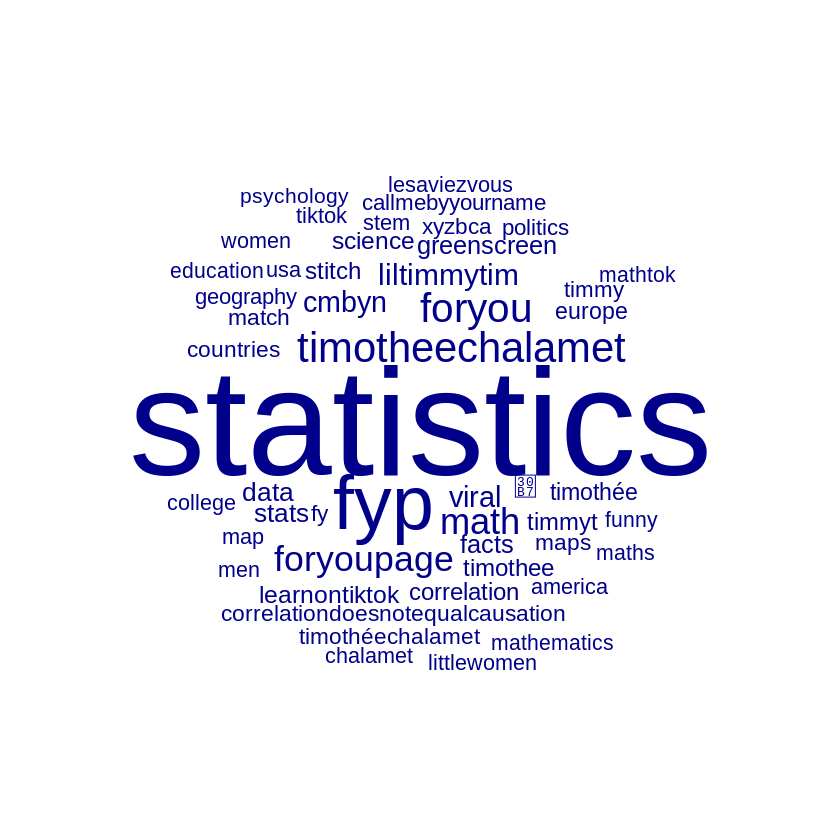

In [ ]:
# Load package
library(quanteda.textplots)

# Create wordcloud
dfm %>% 
  textplot_wordcloud(
    min_size = 1,
    max_size = 8,
    max_words = 50,
    rotation = 0
  )

##### without the searchterm `statistics`

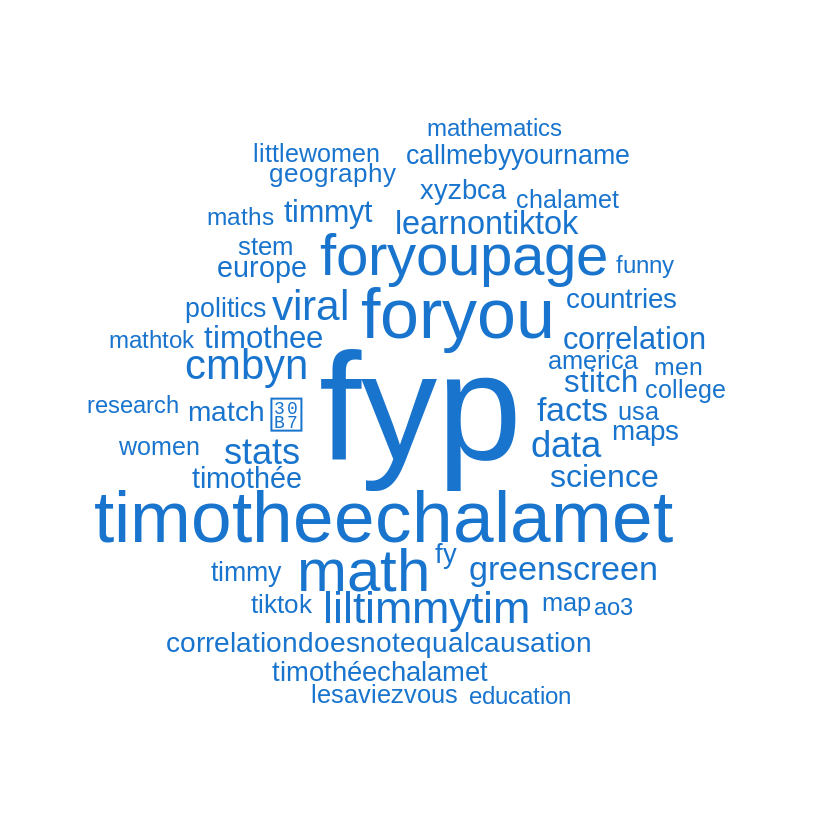

In [ ]:
dfm %>% 
  dfm_remove(pattern = "statistics") %>% 
  textplot_wordcloud(
    min_size = 1,
    max_size = 8,
    max_words = 50,
    rotation = 0,
    color = "dodgerblue3"
  )